### Measuring eccentricity at reference frequencies

In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

%load_ext autoreload
%autoreload 2

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


### Load a PN waveform

In [2]:
lal_kwargs = {"approximant": "EccentricTD",
                  "q": 1.0,
                  "chi1": [0.0, 0.0, 0.0],
                  "chi2": [0.0, 0.0, 0.0],
                  "Momega0": 0.01,
                  "ecc": 0.1,
                  "mean_ano": 0,
                  "include_zero_ecc": True}
dataDict = load_waveform(**lal_kwargs)

### measure eccentricity at a single fref 

In [3]:
from measureEccentricity import eccDefinition

In [4]:
eccDef = eccDefinition.eccDefinition(dataDict)
omega_averaging_methods = list(eccDef.get_availabe_omega_averaging_methods().keys())

In [5]:
omega_averaging_methods

['average_between_extrema', 'orbital_average_at_extrema', 'omega22_zeroecc']

In [7]:
fref_in = 0.03
for averaging_method in omega_averaging_methods:
    fref_out, ecc, mean_ano, eccMethod = measure_eccentricity(
        fref_in=fref_in,
        dataDict=dataDict,
        method="ResidualAmplitude", 
        return_ecc_method=True,
        extra_kwargs={"debug": False, "omega_averaging_method": averaging_method})
    print(f"Averaging method = {averaging_method}, f_ref = {fref_out}, ecc = {ecc}, mean anomaly = {mean_ano}")

Averaging method = average_between_extrema, f_ref = 0.03, ecc = 0.08038266012258283, mean anomaly = 6.0765170522356735
Averaging method = orbital_average_at_extrema, f_ref = 0.03, ecc = 0.07918387317073587, mean anomaly = 2.832294023119635
Averaging method = omega22_zeroecc, f_ref = 0.03, ecc = 0.07958749072549064, mean anomaly = 1.8178020299836744


### measure eccentricity at a reference frequency array

In [8]:
fref_in = np.arange(0.01, 0.1, 0.001)

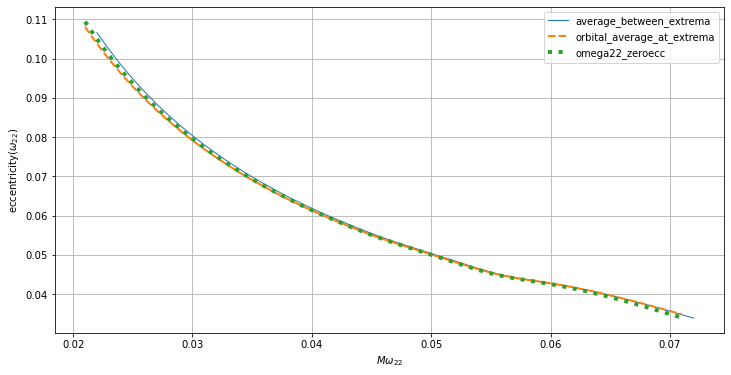

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
lstyles = ["-", "--", ":"]
lwidths = [1, 2, 4]
for idx, averaging_method in enumerate(omega_averaging_methods):
    fref_out, ecc, mean_ano, eccMethod = measure_eccentricity(
        fref_in=fref_in,
        dataDict=dataDict,
        method="ResidualAmplitude", 
        return_ecc_method=True,
        extra_kwargs={"debug": False, "omega_averaging_method": averaging_method})
    ax.plot(fref_out, ecc, ls=lstyles[idx], lw=lwidths[idx], label=f"{averaging_method}")
ax.legend()
ax.set_xlabel(r"$M\omega_{22}$")
ax.set_ylabel("eccentricity($\omega_{22}$)")
ax.grid()